In [1]:
%matplotlib inline

import numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as ticker, IPython.display as ipd
import librosa, librosa.display

The better we can represent our data, the better the performance of our model will be.

To look at the options at our disposal, we will be working with a small audio file. It is an excerpt of a recording of a whale song made available by the [Alaska Whale Foundation](https://www.alaskawhalefoundation.org/). Do check out their website to learn more and for breathtaking imagery!

In [2]:
x, sr = librosa.load('data/whale_singing_excerpt.wav')
ipd.Audio(x, rate=sr)

It is easy to visualize sound in terms of the recorded values of pressure.

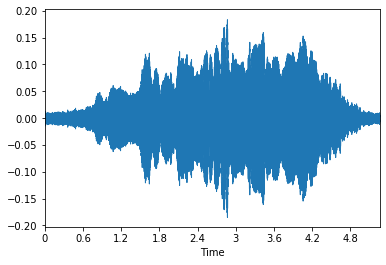

In [3]:
librosa.display.waveplot(x, sr)

If we zoom in closer we will see the recorded amplitudes.

The air (or some other medium, say water) vibrates, our ears are an extremely sensitive mechanism for picking up the change in pressure, and the experience of hearing is produced.

/home/radek/anaconda3/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'samples taken every 1/sr of a second')

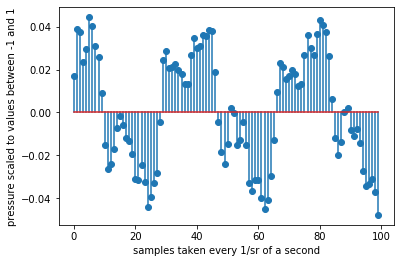

In [4]:
plt.stem(x[40000:40100])
plt.ylabel('pressure scaled to values between -1 and 1')
plt.xlabel('samples taken every 1/sr of a second')

This way of representing sound (as a series of pressure measurements) is a good starting point. Many models accept a 1d array of values as inputs. Further to that, one can use this raw representation to calculate [useful features](https://musicinformationretrieval.com/index.html#Signal-Analysis-and-Feature-Extraction) to feed to a model.

Quite often though it is useful to get a sense of what are the frequencies that go into producing a sound and how they vary over time. There is a family of representations based on the Fourier Transform that strives to achieve just that.

If you would like to learn about the Fourier Transform, this website is [the best place to start](https://jackschaedler.github.io/circles-sines-signals/part3.html). There is also a [great youtube video](https://www.youtube.com/watch?v=spUNpyF58BY) that goes deeper into the details of how FFT works and has amazing visualizations.

But the details behind all the calculations will not be all that important to us. It is enough to have a general sense of what we are after and understand the knobs we can turn to achieve really good results.

/home/radek/.local/lib/python3.7/site-packages/librosa/display.py:725: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


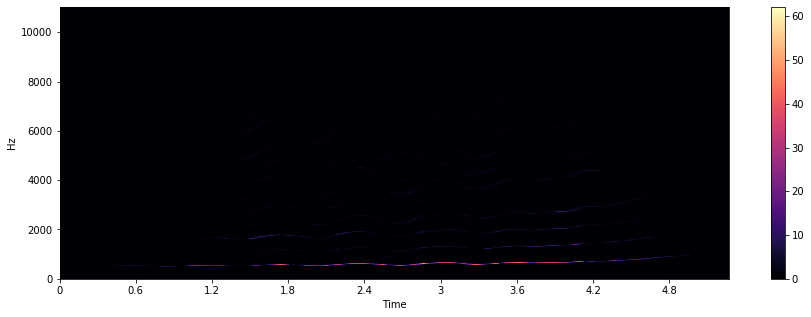

In [5]:
hop_length = 512
n_fft = 2048
S = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar()

This looks interesting... but we cannot see much! Why is that?

In earlier notebooks we discussed how the perception of sound is logarithmic both when it comes to pitch and loudness. Here the frequency axis is linear - a lot of information is squeezed into the the range of values close to 0.

To improve the representation, let's move frequency to logscale.

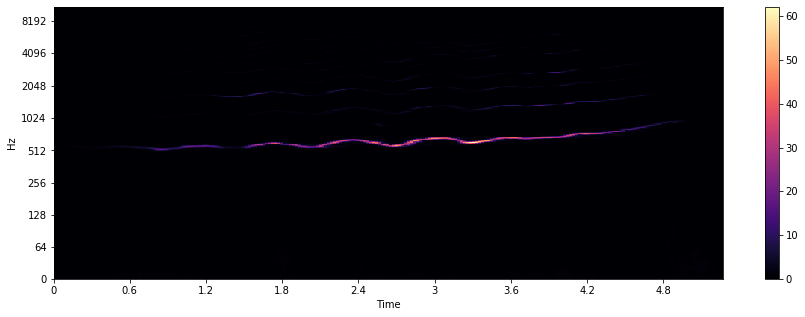

In [6]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

This looks better! But why do the numbers seem so polarized - we seem to have a lot of very low values and only a few really high that we can pick out with ease?

Sound intensity, loudness, is another aspect of sound that we perceive in a logarithmic and not linear way! A sound that has 1000x the energy of some other sound will only seem 4 times as loud to us!

Let's transform our loudness values to decibels and thus move to the logscale for sound intensity as well (like we did for frequency).

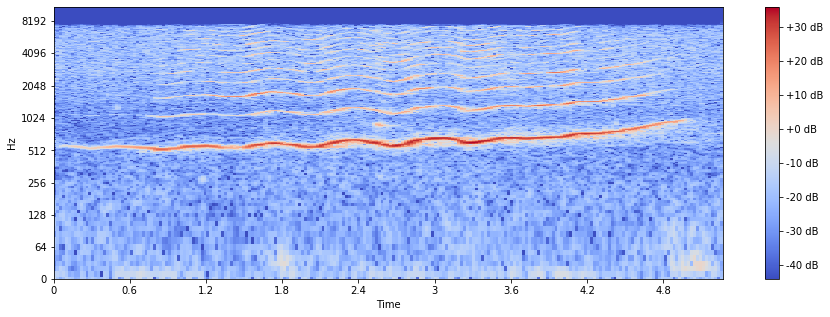

In [7]:
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(15, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

Seems there was a lot of information that the disproportionately high values were obscuring!

Last but not least, let's draw a Mel-spectogram. Here the y axis will be on the [mel scale](https://en.wikipedia.org/wiki/Mel_scale) which has been empirically constructed to more closely match how we perceive the pitch of a sound.

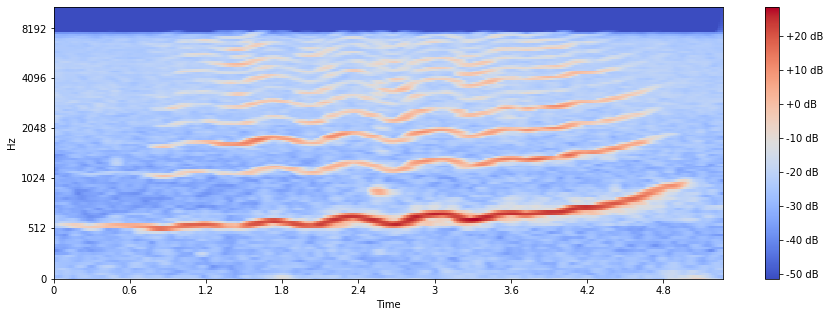

In [8]:
hop_length = 256
S = librosa.feature.melspectrogram(x, sr=sr, n_fft=4096, hop_length=hop_length)

logS = librosa.power_to_db(abs(S))

plt.figure(figsize=(15, 5))
librosa.display.specshow(logS, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

Throughout all these, there were only two hyperparameter values that we were tweaking - the `n_fft` and `hop_length`.

`n_fft` is just the size of the window that is used to analyze the data. With an `n_fft` of 4096 the intensity of every pixel will be calculated based on a window looking at 4096 samples. The `librosa` [documentation](https://librosa.github.io/librosa/generated/librosa.core.stft.html#librosa.core.stft) gives us some nice defaults we can try.

`hop_length` is how many samples will be skipped over between performing calculations on the signal. With a `hop_length` of 256, the window will move by 256 samples before another calculation is performed. The lower the value, the more calculations are performed and the wider the array of results we receive.

The code in this notebooks has been adapted in parts or taken directly from https://musicinformationretrieval.com/stft.html. This site is a very useful resource though some of the explanations might be a bit more on the technical side.